# Post-MD Analysis

In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md

## Reading inputs, for the sake of this tutorial, the final PDB used

In [13]:
crystal_fn = './prod_lig_1.pdb'
trajectory_fn = './prot_lig_prod.dcd'

In [14]:
crystal = md.load(crystal_fn)
trajectory = md.load(trajectory_fn, top=crystal)  # load the xtc. the crystal structure defines the topology
trajectory

<mdtraj.Trajectory with 25 frames, 56495 atoms, 17382 residues, and unitcells at 0x7fd6c2e7ac10>

## Deleting H atoms,leaving only heavy atoms 

In [15]:
rmsds_to_crystal = md.rmsd(trajectory, crystal, 0)
heavy_atoms = [atom.index for atom in crystal.topology.atoms if atom.element.symbol != 'H']
heavy_rmds_to_crystal = md.rmsd(trajectory, crystal, 0, atom_indices=heavy_atoms)

Text(0, 0.5, 'RMSD (nm)')

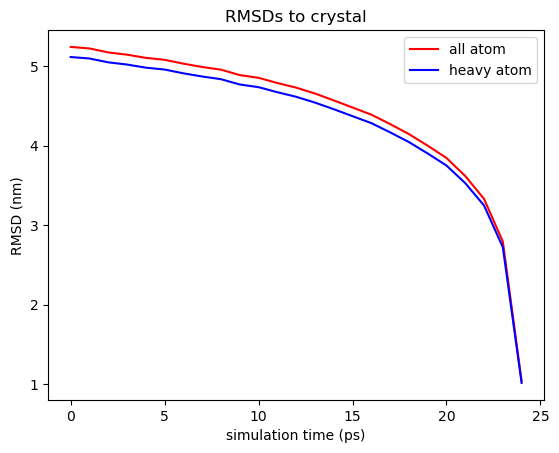

In [16]:
from matplotlib import pyplot as plt
plt.plot(trajectory.time, rmsds_to_crystal, 'r', label='all atom')
plt.plot(trajectory.time, heavy_rmds_to_crystal, 'b', label='heavy atom')
plt.legend()
plt.title('RMSDs to crystal')
plt.xlabel('simulation time (ps)')
plt.ylabel('RMSD (nm)')

# Note This plot is a reversed RMSD plot, since the reference PDB is the final PDB instead of initial PDB